# Question 1

In [1]:
import numpy as np

#Read
sig1 = np.genfromtxt("230m_11.txt",delimiter=',')
sig2 = np.genfromtxt("106m_15.txt",delimiter=',')

print(sig1,sig2)

[ -9.08916667 -10.08916667 -10.08916667 ... -22.08916667 -24.08916667
 -21.08916667] [ 15.63416667  19.63416667  17.63416667 ... -35.36583333 -35.36583333
 -33.36583333]


In [2]:
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy import signal

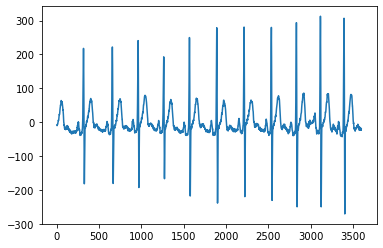

In [3]:
plt.plot(sig1)

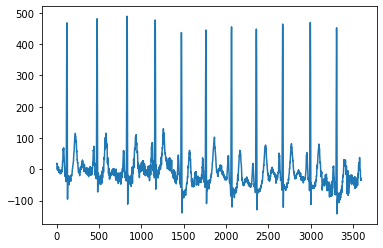

In [4]:
plt.plot(sig2)

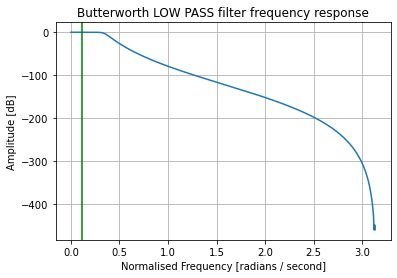

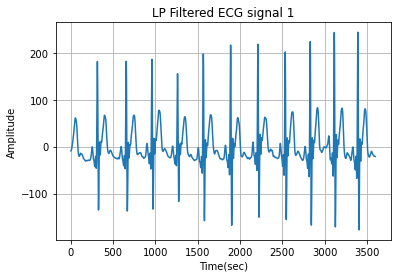

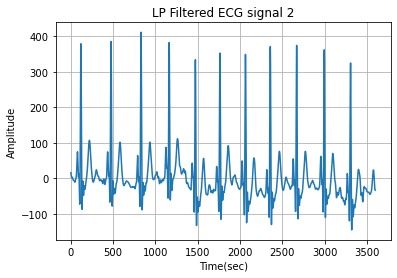

In [5]:
#part a
#Butterworth filter design
N=8 #order of the filter( changed different values 8,4 and 2)

#Butterworth lowpass filter

lpcf=11
fs=200
b,a = signal.butter(N, (lpcf/fs)*2, 'low')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Butterworth LOW PASS filter frequency response')
plt.xlabel('Normalised Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.axvline((lpcf/fs)*2, color='green') # cutoff frequency
plt.show()

#Filtering input ECG signals
lpfilt_ecg1 = signal.filtfilt(b,a,sig1)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('LP Filtered ECG signal 1')
plt.grid()
plt.plot(lpfilt_ecg1)
plt.show()

lpfilt_ecg2 = signal.filtfilt(b,a,sig2)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('LP Filtered ECG signal 2')
plt.grid()
plt.plot(lpfilt_ecg2)
plt.show()

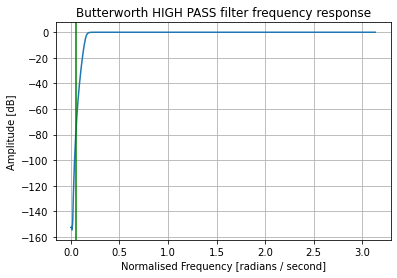

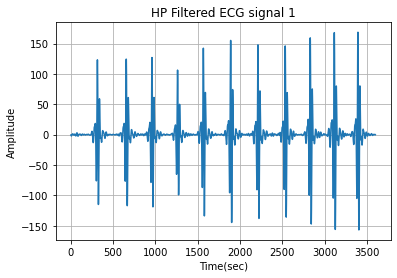

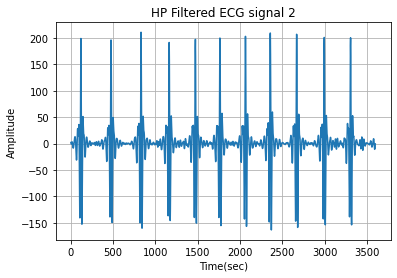

In [6]:
# Butterworth high pass filter

hpcf=5
fs=200
b,a = signal.butter(N, (hpcf/fs)*2, 'high')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Butterworth HIGH PASS filter frequency response')
plt.xlabel('Normalised Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.axvline((hpcf/fs)*2, color='green') # cutoff frequency
plt.show()

#Filtering input ECG signals
filt_ecg1 = signal.filtfilt(b,a,lpfilt_ecg1)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('HP Filtered ECG signal 1')
plt.grid()
plt.plot(filt_ecg1)
plt.show()

filt_ecg2 = signal.filtfilt(b,a,lpfilt_ecg2)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('HP Filtered ECG signal 2')
plt.grid()
plt.plot(filt_ecg2)
plt.show()

C:\Users\SAIJOS~1\AppData\Local\Temp/ipykernel_36384/3752350457.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w,20*np.log10(np.abs(h)))


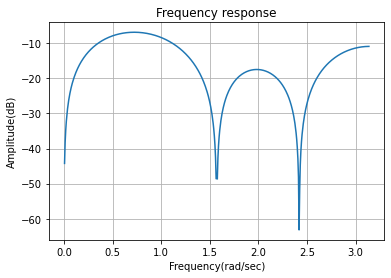

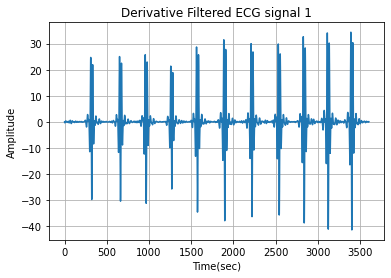

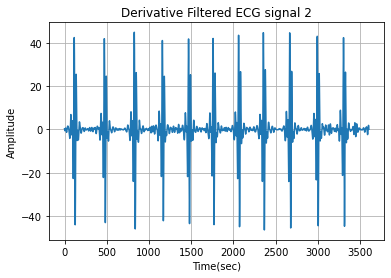

In [7]:
#part b
#Design of derivative filter

num= np.array([2,1,1,-1,-1,-2])/14
w,h= signal.freqz(num)
plt.plot(w,20*np.log10(np.abs(h)))
plt.ylabel('Amplitude(dB)')
plt.xlabel('Frequency(rad/sec)')
plt.title('Frequency response')
plt.grid()
plt.show()

#After passing output of butterworth filtered signal to derivative filter
der_filt_ecg1 = signal.convolve(num,filt_ecg1)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Derivative Filtered ECG signal 1')
plt.grid()
plt.plot(der_filt_ecg1)
plt.show()

der_filt_ecg2 = signal.convolve(num,filt_ecg2)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Derivative Filtered ECG signal 2')
plt.grid()
plt.plot(der_filt_ecg2)
plt.show()

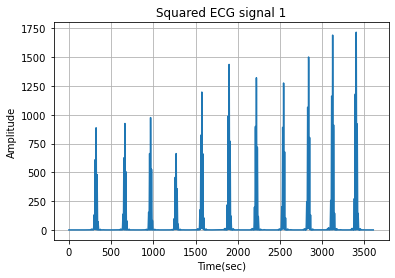

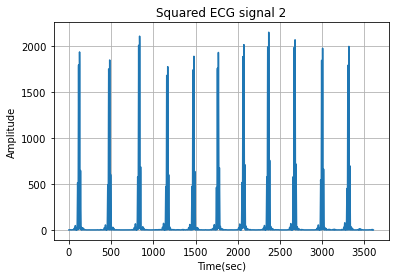

In [8]:
#part c
#squaring
sq_ECGsig1=der_filt_ecg1**2
sq_ECGsig2=der_filt_ecg2**2


plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.title('Squared ECG signal 1')
plt.grid()
plt.plot(sq_ECGsig1)
plt.show()

plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.title('Squared ECG signal 2')
plt.grid()
plt.plot(sq_ECGsig2)
plt.show()

C:\Users\SAIJOS~1\AppData\Local\Temp/ipykernel_36384/1051875994.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w,20*np.log10(np.abs(h)))


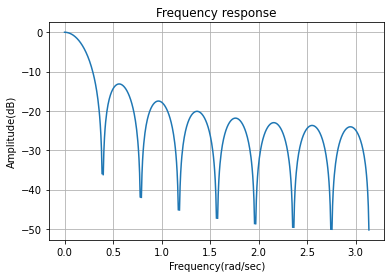

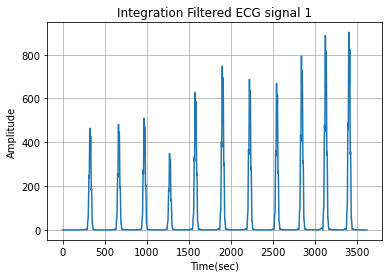

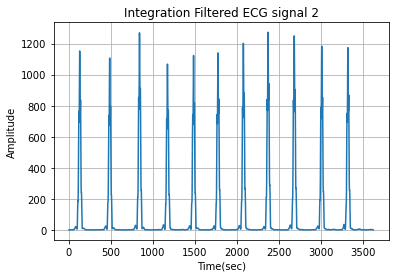

In [9]:
#part d
#integration

num=(1/16)*np.ones([16])
w,h= signal.freqz(num)
plt.plot(w,20*np.log10(np.abs(h)))
plt.ylabel('Amplitude(dB)')
plt.xlabel('Frequency(rad/sec)')
plt.title('Frequency response')
plt.grid()
plt.show()


#After passing output of squaring signal to integration filter
intgr_filt_ecg1 = signal.convolve(num,sq_ECGsig1)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Integration Filtered ECG signal 1')
plt.grid()
plt.plot(intgr_filt_ecg1)
plt.show()

intgr_filt_ecg2 = signal.convolve(num,sq_ECGsig2)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Integration Filtered ECG signal 2')
plt.grid()
plt.plot(intgr_filt_ecg2)
plt.show()

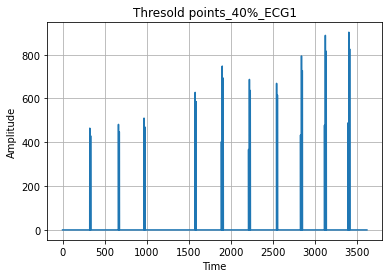

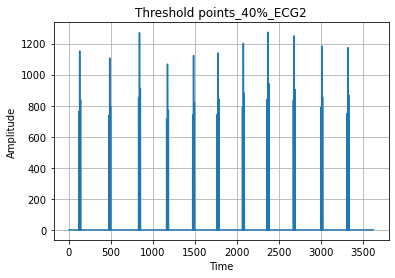

In [10]:
#Thresold at 40% of maximum value
t=0.4
Threshold= t*np.max(intgr_filt_ecg1)
final_ecg_out1= np.zeros(np.size(intgr_filt_ecg1))
for i in np.arange(0,np.size(intgr_filt_ecg1)):
    if (intgr_filt_ecg1[i]>Threshold and intgr_filt_ecg1[i]>intgr_filt_ecg1[i+1] and intgr_filt_ecg1[i]>intgr_filt_ecg1[i-1]):
        final_ecg_out1[i]=intgr_filt_ecg1[i]
        
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Thresold points_40%_ECG1')
plt.grid()
plt.plot(final_ecg_out1)
plt.show()
Threshold= t*np.max(intgr_filt_ecg2)
final_ecg_out2= np.zeros(np.size(intgr_filt_ecg2))
for i in np.arange(0,np.size(intgr_filt_ecg2)):
    if (intgr_filt_ecg2[i]>Threshold and intgr_filt_ecg2[i]>intgr_filt_ecg2[i+1] and intgr_filt_ecg2[i]>intgr_filt_ecg2[i-1]):
        final_ecg_out2[i]=intgr_filt_ecg2[i]
        
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Threshold points_40%_ECG2')
plt.grid()
plt.plot(final_ecg_out2)
plt.show()

In [11]:
#Heartrate calculation
j,r1= 0,0
t= np.zeros(np.size(final_ecg_out1))
for i in range(len(final_ecg_out1)):
    if final_ecg_out1[i]>0:
        t[j]=i
        j=j+1
m=j-1
for i in range(m):
    r1=(r1+t[i+1]-t[i])/m
BPM1=60/r1

j,r2= 0,0
t= np.zeros(np.size(final_ecg_out2))
for i in range(len(final_ecg_out2)):
    if final_ecg_out2[i]>0:
        t[j]=i
        j=j+1
m=j-1
for i in range(m):
    r2=(r2+t[i+1]-t[i])/m
BPM2=60/r2
print("FOR THRESHOLD 0.4 MAX VALUE",BPM1,BPM2)

FOR THRESHOLD 0.4 MAX VALUE 132.50997795940035 181.18329292546923


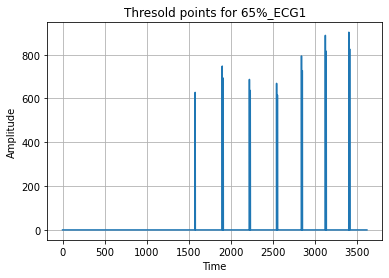

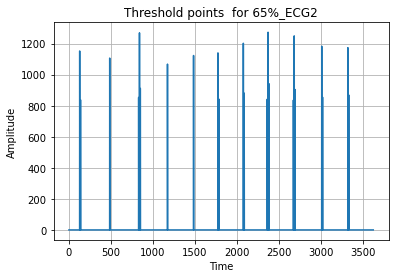

In [12]:
#Thresold at 65% of maximum value
t=0.65
Threshold= t*np.max(intgr_filt_ecg1)
final_ecg_out1= np.zeros(np.size(intgr_filt_ecg1))
for i in np.arange(0,np.size(intgr_filt_ecg1)):
    if (intgr_filt_ecg1[i]>Threshold and intgr_filt_ecg1[i]>intgr_filt_ecg1[i+1] and intgr_filt_ecg1[i]>intgr_filt_ecg1[i-1]):
        final_ecg_out1[i]=intgr_filt_ecg1[i]
        
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Thresold points for 65%_ECG1')
plt.grid()
plt.plot(final_ecg_out1)
plt.show()
Threshold= t*np.max(intgr_filt_ecg2)
final_ecg_out2= np.zeros(np.size(intgr_filt_ecg2))
for i in np.arange(0,np.size(intgr_filt_ecg2)):
    if (intgr_filt_ecg2[i]>Threshold and intgr_filt_ecg2[i]>intgr_filt_ecg2[i+1] and intgr_filt_ecg2[i]>intgr_filt_ecg2[i-1]):
        final_ecg_out2[i]=intgr_filt_ecg2[i]
        
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Threshold points  for 65%_ECG2')
plt.grid()
plt.plot(final_ecg_out2)
plt.show()

In [13]:
#Heartrate calculation
j,r1= 0,0
t= np.zeros(np.size(final_ecg_out1))
for i in range(len(final_ecg_out1)):
    if final_ecg_out1[i]>0:
        t[j]=i
        j=j+1
m=j-1
for i in range(m):
    r1=(r1+t[i+1]-t[i])/m
BPM1=60/r1

j,r2= 0,0
t= np.zeros(np.size(final_ecg_out2))
for i in range(len(final_ecg_out2)):
    if final_ecg_out2[i]>0:
        t[j]=i
        j=j+1
m=j-1
for i in range(m):
    r2=(r2+t[i+1]-t[i])/m
BPM2=60/r2
print("FOR THRESHOLD 0.65 MAX VALUE",BPM1,BPM2)

FOR THRESHOLD 0.65 MAX VALUE 22.0545533533874 51.65988986273977


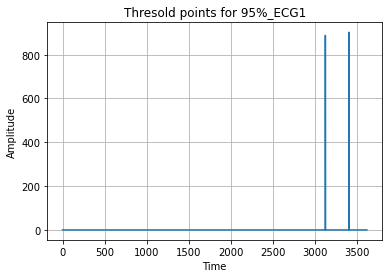

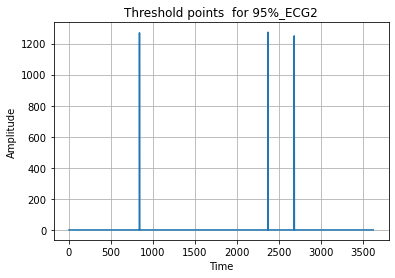

In [14]:
#Thresold at 95% of maximum value
t=0.95
Threshold= t*np.max(intgr_filt_ecg1)
final_ecg_out1= np.zeros(np.size(intgr_filt_ecg1))
for i in np.arange(0,np.size(intgr_filt_ecg1)):
    if (intgr_filt_ecg1[i]>Threshold and intgr_filt_ecg1[i]>intgr_filt_ecg1[i+1] and intgr_filt_ecg1[i]>intgr_filt_ecg1[i-1]):
        final_ecg_out1[i]=intgr_filt_ecg1[i]
        
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Thresold points for 95%_ECG1')
plt.grid()
plt.plot(final_ecg_out1)
plt.show()
Threshold= t*np.max(intgr_filt_ecg2)
final_ecg_out2= np.zeros(np.size(intgr_filt_ecg2))
for i in np.arange(0,np.size(intgr_filt_ecg2)):
    if (intgr_filt_ecg2[i]>Threshold and intgr_filt_ecg2[i]>intgr_filt_ecg2[i+1] and intgr_filt_ecg2[i]>intgr_filt_ecg2[i-1]):
        final_ecg_out2[i]=intgr_filt_ecg2[i]
        
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Threshold points  for 95%_ECG2')
plt.grid()
plt.plot(final_ecg_out2)
plt.show()

In [15]:
#Heartrate calculation
j,r1= 0,0
t= np.zeros(np.size(final_ecg_out1))
for i in range(len(final_ecg_out1)):
    if final_ecg_out1[i]>0:
        t[j]=i
        j=j+1
m=j-1
for i in range(m):
    r1=(r1+t[i+1]-t[i])/m
BPM1=60/r1

j,r2= 0,0
t= np.zeros(np.size(final_ecg_out2))
for i in range(len(final_ecg_out2)):
    if final_ecg_out2[i]>0:
        t[j]=i
        j=j+1
m=j-1
for i in range(m):
    r2=(r2+t[i+1]-t[i])/m
BPM2=60/r2
print("FOR THRESHOLD 0.9 MAX VALUE",BPM1,BPM2)

FOR THRESHOLD 0.9 MAX VALUE 0.21505376344086022 0.11157601115760112


# Question 2

[[ 1495.52133333  1255.52133333   -71.47866667 ...    31.52133333
   1177.52133333  1543.52133333]
 [  289.6          -91.4         -862.4        ...  -950.4
  -1619.4        -1844.4       ]
 [ 1302.98266667   985.98266667  -200.01733333 ...   351.98266667
   1131.98266667  1434.98266667]
 ...
 [ -148.212        -11.212       -172.212      ...  -778.212
  -1359.212      -1823.212     ]
 [ -478.62533333  -370.62533333 -1327.62533333 ...    93.37466667
    713.37466667   981.37466667]
 [  448.17866667   337.17866667  -150.82133333 ...  -746.82133333
  -1571.82133333 -2279.82133333]]


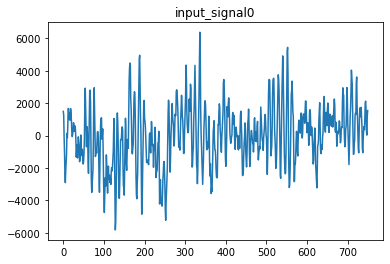

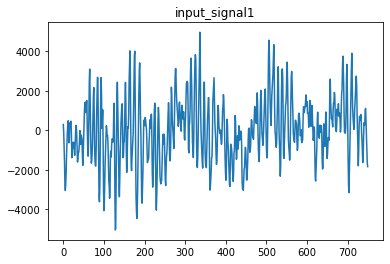

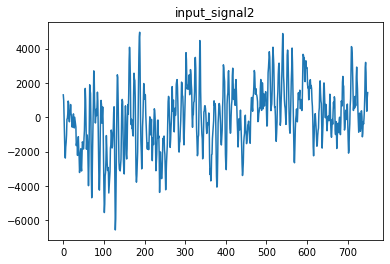

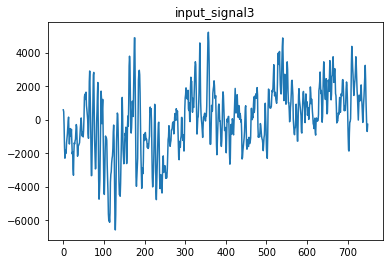

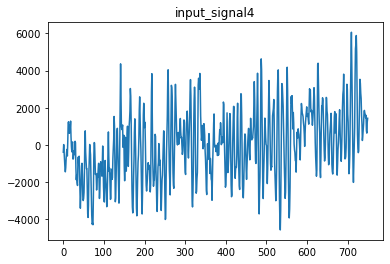

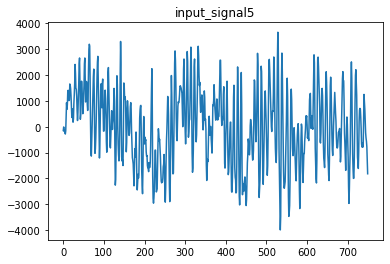

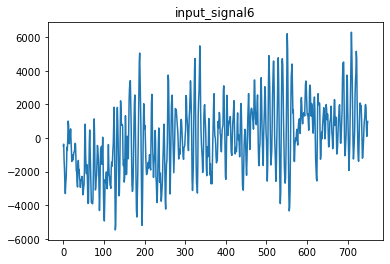

In [16]:
import numpy as np


inpt_signal = np.zeros((8,750))

inpt_signal[0]=np.loadtxt('eeg-c3.dat',delimiter=',')
inpt_signal[1]=np.loadtxt('eeg-c4.dat',delimiter=',')
inpt_signal[2]=np.loadtxt('eeg-f3.dat',delimiter=',')
inpt_signal[3]=np.loadtxt('eeg-f4.dat',delimiter=',')
inpt_signal[4]=np.loadtxt('eeg-o1.dat',delimiter=',')
inpt_signal[5]=np.loadtxt('eeg-o2.dat',delimiter=',')
inpt_signal[6]=np.loadtxt('eeg-p3.dat',delimiter=',')
inpt_signal[7]=np.loadtxt('eeg-p4.dat',delimiter=',')

for i in range(0,8):
    inpt_signal[i] = inpt_signal[i] - np.mean(inpt_signal[i])
	
print(inpt_signal)
for i in range(7):
    plt.plot(inpt_signal[i])
    plt.title("input_signal"+str(i))
    plt.show()

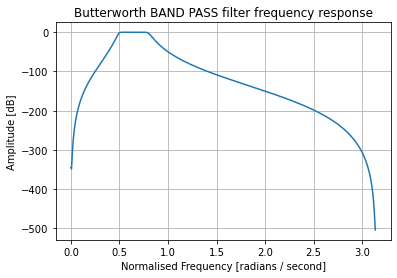

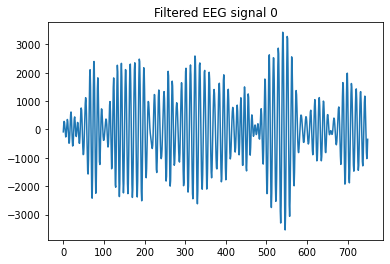

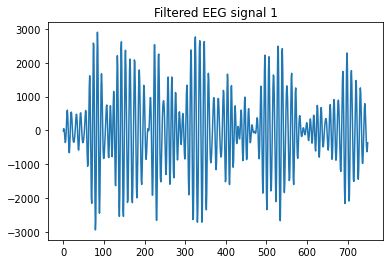

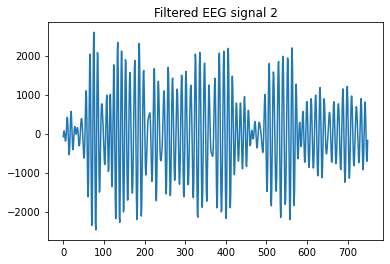

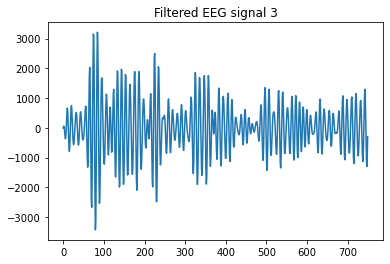

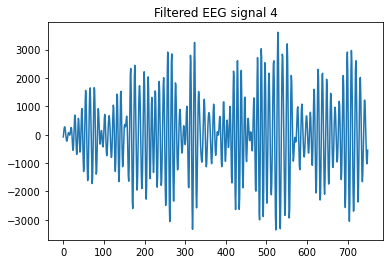

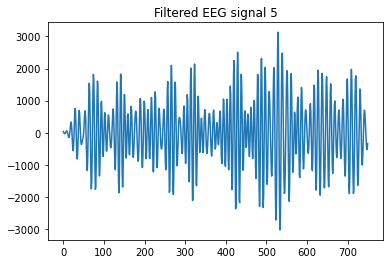

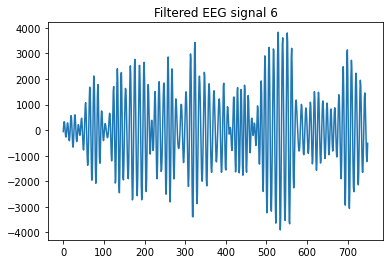

In [17]:
#part a
#Butterworth band pass filter
N=8
fs=102
hpcf=8
lpcf=13
b,a = signal.butter(N, [(hpcf/fs)*2,(lpcf/fs)*2], 'bandpass')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Butterworth BAND PASS filter frequency response')
plt.xlabel('Normalised Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.show()
filt_eeg=inpt_signal
#passing through filter
for i in range(7):
    filt_eeg[i]=signal.filtfilt(b,a,inpt_signal[i])
    plt.plot(filt_eeg[i])
    plt.title("Filtered EEG signal "+str(i))
    plt.show()

75

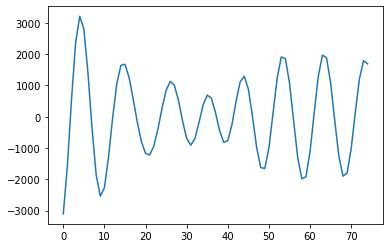

In [18]:
#part b
temp=inpt_signal[3][80:155]
plt.plot(temp)
len(temp)

Two methods to calculate cross spectral density

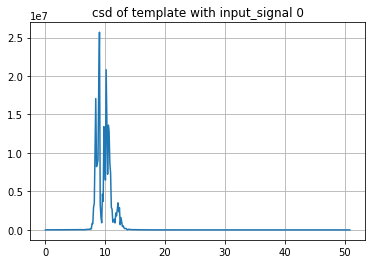

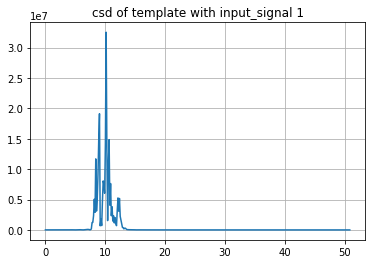

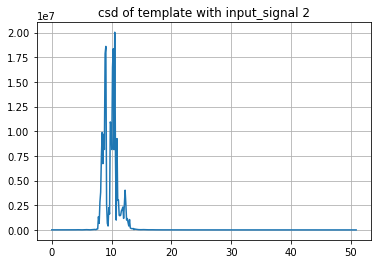

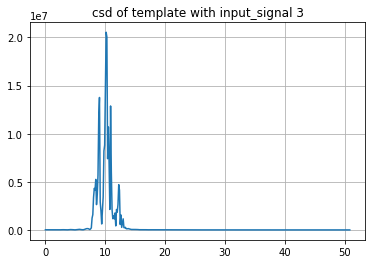

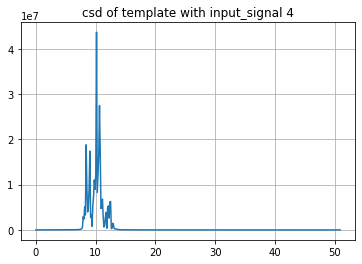

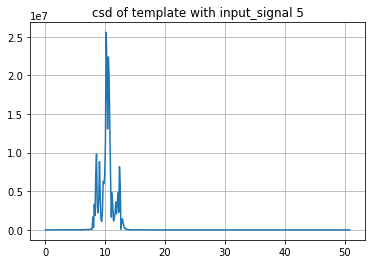

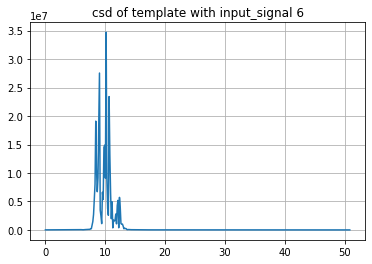

In [19]:
#cross spectral density 
from scipy.fft import fft, fftfreq
for i in range(7):
    # Normalise the signals using the z-score normalisation.
    signal_1=temp
    signal_2=filt_eeg[i]
    corr= signal.correlate(signal_1,signal_2)
    #calculation of fourier transform of correlated signal.
    # Number of sample points
    N = len(corr)
    # sample spacing
    T = 1.0 / fs
    y=corr
    yf = fft(y)
    xf = fftfreq(N, T)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid()
    plt.title("csd of template with input_signal "+str(i))
    plt.show()
    

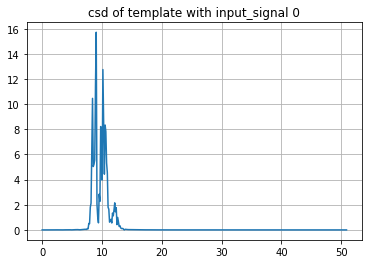

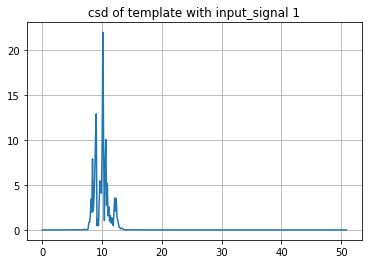

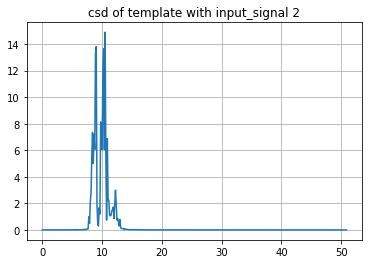

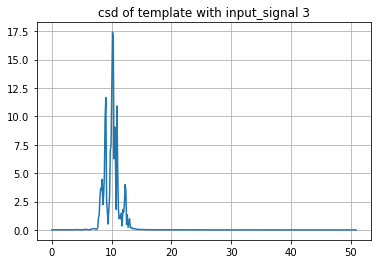

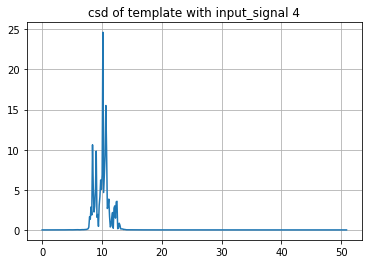

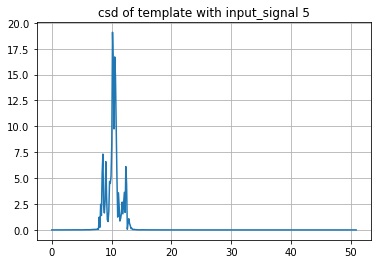

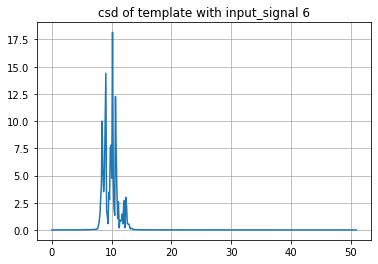

In [20]:
#cross spectral density 
from scipy.fft import fft, fftfreq
for i in range(7):
    # Normalise the signals using the z-score normalisation.
    signal_1=temp
    m_signal_1 = signal_1 - np.mean(signal_1); 
    w_signal_1 = m_signal_1 / np.std(m_signal_1)
    
    # Calculate the full cross-correlation between the two signals.
    signal_2=filt_eeg[i]
    m_signal_2 = signal_2 - np.mean(signal_2); 
    w_signal_2 = m_signal_2 / np.std(m_signal_2)
    corr = np.convolve(w_signal_1,w_signal_2)

    #calculation of fourier transform of correlated signal.
    # Number of sample points
    N = len(corr)
    # sample spacing
    T = 1.0 / fs
    y=corr
    yf = fft(y)
    xf = fftfreq(N, T)[:N//2]
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid()
    plt.title("csd of template with input_signal "+str(i))
    plt.show()
    
